# Opening EN4 files containing ARGO profiles

In [1]:
## path for mdules

import sys
sys.path.insert(0,"/home/users/albert6a/lib/python")

In [2]:
## imports

import numpy as np
import dask
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

In [3]:
## datasets

dir="/home/users/albert6a/Data/ARGO/"
file012012="EN.4.2.0.f.profiles.g10.201201.nc"
files="EN.4.2.0.f.profiles.g10.2012*.nc"

tfile012012=dir+file012012
tfiles=dir+files

!ls $tfile012012
!ls $tfiles


/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201201.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201201.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201202.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201203.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201204.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201205.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201206.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201207.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201208.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201209.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201210.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201211.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201212.nc


In [4]:
argo012012=xr.open_dataset(tfile012012)
dep=argo012012['DEPH_CORRECTED']
lat=argo012012['LATITUDE']
lon=argo012012['LONGITUDE']
temp=argo012012['POTM_CORRECTED']
sal=argo012012['PSAL_CORRECTED']
day=argo012012['JULD']


In [5]:
temp.shape

(23689, 400)

In [6]:
dday=day.values[0]

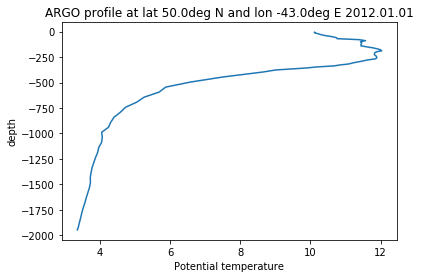

In [7]:
plt.plot(temp[0,:],-1*dep[0,:])
plt.xlabel('Potential temperature')
plt.ylabel('depth')

ts = pd.to_datetime(str(day.values[0])) 
d = ts.strftime('%Y.%m.%d')
title="ARGO profile at lat "+str(np.trunc(lat.values[0]))+"deg N and lon "+str(np.trunc(lon.values[0]))+"deg E "+str(d)
plt.title(title)

In [25]:
def plot_temp_profils(nprof):
    plt.plot(temp[nprof,:],-1*dep[nprof,:])
    plt.xlabel('Potential temperature')
    plt.ylabel('depth')
    ts = pd.to_datetime(str(day.values[nprof])) 
    d = ts.strftime('%Y.%m.%d')
    title="ARGO profile at lat "+str(np.trunc(lat.values[nprof]))+"deg N and lon "+str(np.trunc(lon.values[nprof]))+"deg E "+str(d)
    plt.title(title)

In [26]:
def plot_sal_profils(nprof):
    plt.plot(sal[nprof,:],-1*dep[nprof,:])
    plt.xlabel('Practical salinity')
    plt.ylabel('depth')
    ts = pd.to_datetime(str(day.values[nprof])) 
    d = ts.strftime('%Y.%m.%d')
    title="ARGO profile at lat "+str(np.trunc(lat.values[nprof]))+"deg N and lon "+str(np.trunc(lon.values[nprof]))+"deg E "+str(d)
    plt.title(title)

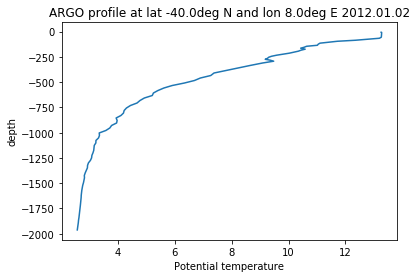

In [27]:
plot_temp_profils(100)

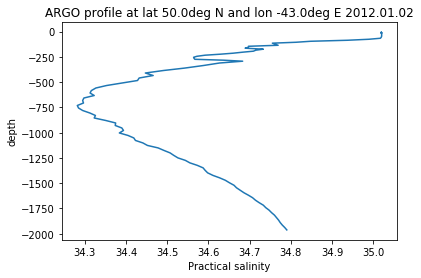

In [11]:
plot_sal_profils(100)

In [12]:
ts = pd.to_datetime(str(day.values[100])) 
d = ts.strftime('%Y.%m.%d')
dyear=d[0:4]
dmonth=d[6:7]
dday=d[9:10]
print dyear,dmonth,dday

2012 1 2


In [13]:
dyear=ts.strftime('%Y')
dmonth=ts.strftime('%m')
dday=ts.strftime('%d')
print dyear,dmonth,dday

2012 01 02


In [14]:
day

<xarray.DataArray 'JULD' (N_PROF: 23689)>
array(['2012-01-01T23:52:00.000000000', '2012-01-01T23:26:02.000000000',
       '2012-01-01T23:16:54.000000000', ..., '2012-01-31T22:52:48.000000000',
       '2012-01-31T22:37:48.000000000', '2012-01-31T23:30:00.000000000'], dtype='datetime64[ns]')
Dimensions without coordinates: N_PROF
Attributes:
    long_name:    julian day (utc) of the station relative to reference_date_...
    conventions:  relative julian days with decimal part (as parts of day)
    _fillvalue:   99999.0

In [15]:
date=day.values[:]
len(date)

23689

In [16]:
def find_date(year,month,tday):
    prof=[]
    for t in np.arange(0,len(date)):
        ts = pd.to_datetime(str(day.values[t])) 
        dyear=ts.strftime('%Y')
        dmonth=ts.strftime('%m')
        dday=ts.strftime('%d')
        if dyear == year:
            if dmonth == month:
                if dday == tday:
                    prof.append(t)
        aprof=np.array(prof)
    return aprof
                    

In [17]:
t06=find_date('2012','01','06')

In [18]:
t06.shape

(787,)

In [19]:
date06=day.values[t06]

In [20]:
t06.shape

(787,)

In [21]:
tlat06=[]
for t in np.arange(0,len(t06)):
    if lat[t06[t]] > 27:
        if lat[t06[t]]<67:
            tlat06.append(t06[t])
atlat06=np.array(tlat06)
atlat06.shape

(250,)

In [22]:
tlatlon06=[]
for t in np.arange(0,len(atlat06)):
    if lon[atlat06[t]] > -87:
        if lon[atlat06[t]]<17:
            tlatlon06.append(atlat06[t])
atlatlon06=np.array(tlatlon06)
atlatlon06.shape

(117,)

In [23]:
atlatlon06[:]

array([  455,   456,   459,   462,   463,   467,   468,   472,   473,
         475,   477,   479,   480,   481,   482,   483,   485,   486,
         496,   497,   501,   507,   508,   513,   515,   517,   518,
         520,   523,   524,   527,   528,   530,   533,   534,   536,
         538,   544,   545,   552,   553, 11714, 11715, 11716, 11717,
       11718, 11719, 11720, 11947, 11948, 11949, 11950, 11951, 11952,
       11953, 11970, 11971, 11972, 11973, 12041, 12075, 12076, 12077,
       12078, 12082, 12083, 12084, 12102, 12241, 12242, 12243, 12244,
       12245, 12246, 12247, 12335, 12336, 12337, 12338, 12339, 12340,
       12513, 12514, 12515, 12516, 12574, 12840, 12841, 12842, 12862,
       12863, 12896, 12897, 12898, 12929, 12930, 12952, 12953, 12954,
       12955, 12956, 13008, 13009, 13010, 13011, 13012, 13139, 13140,
       13141, 13142, 13143, 17592, 17601, 17607, 17610, 17614, 17621])

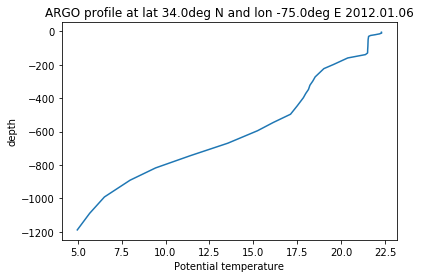

In [28]:
plot_temp_profils(455)